In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
from gensim.models import Word2Vec

Input Analysis

What are the length distributions of documents and sentences? Any outliers?

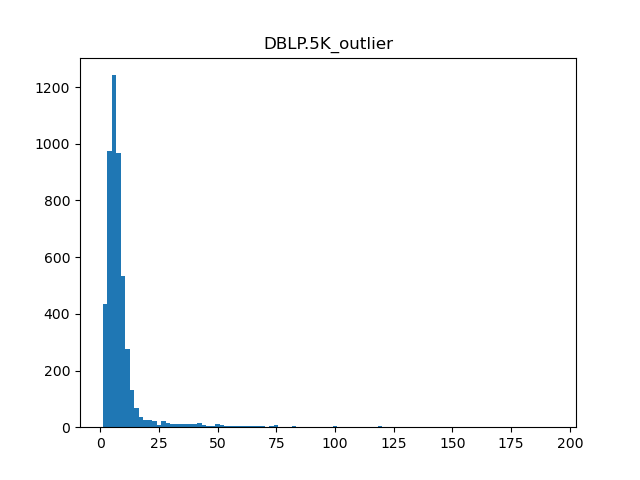

In [2]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

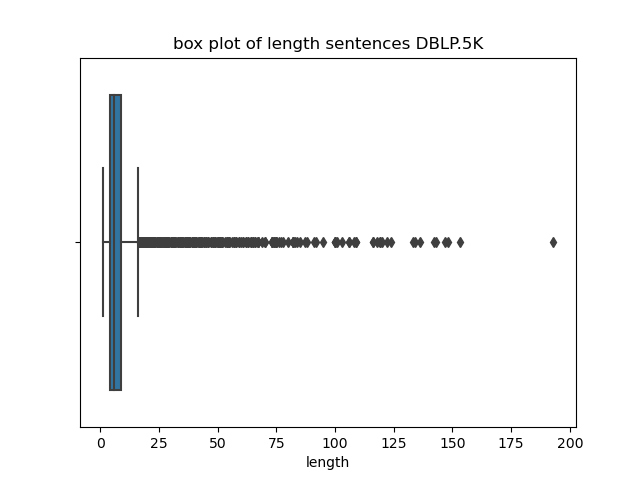

In [3]:
Image("../data/eda/boxplot.png")

After removing the outliers..

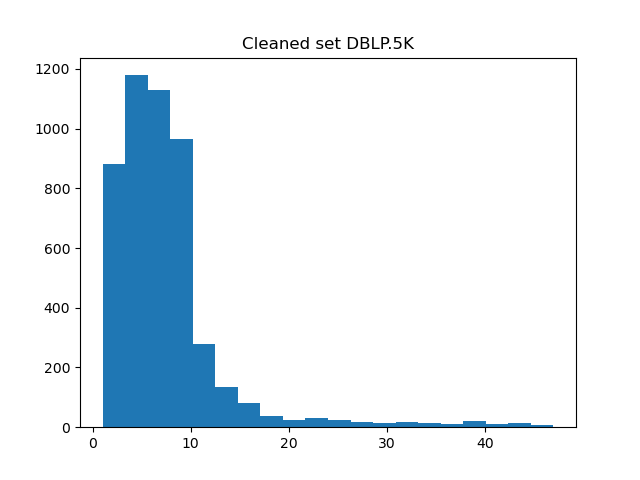

In [4]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

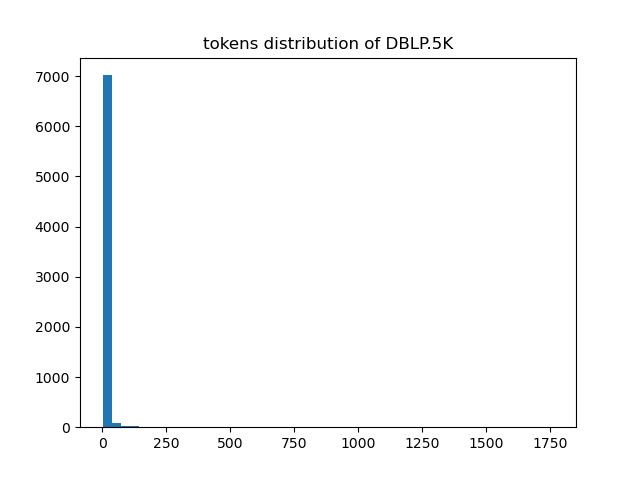

In [5]:
Image("../data/eda/tokens_distribution.png")

In [7]:
f = open("../data/eda/description.txt", "r")
print(f.read())

Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5912.


Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

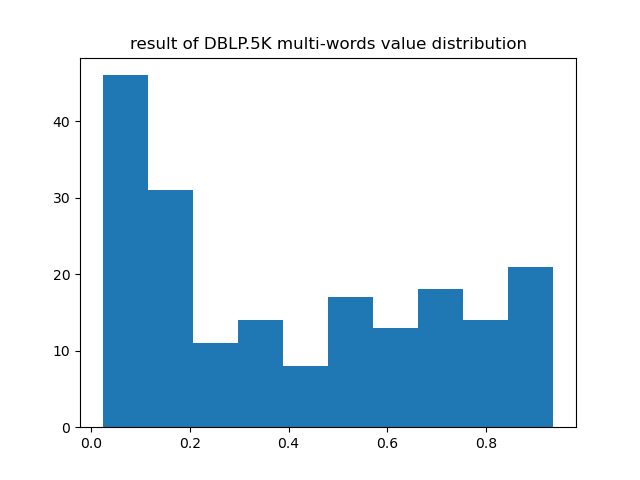

In [8]:
Image("../data/outputs/multi_value_distribution.png")

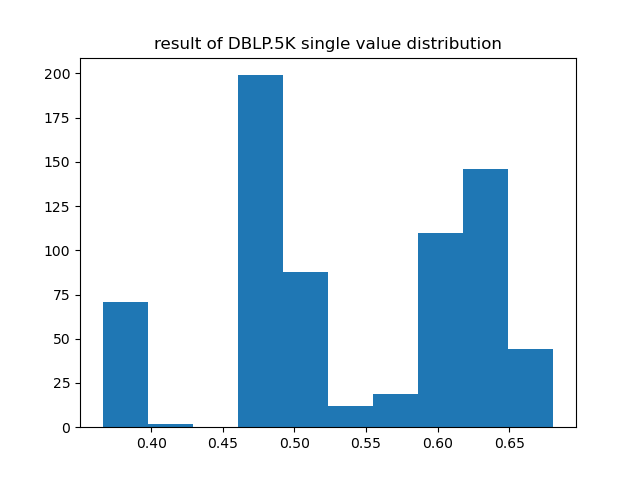

In [9]:
Image("../data/outputs/single_value_distribution.png")

Obviously single word generally has a higher quality score.

In [10]:
df = pd.read_csv('../data/outputs/AutoPhrase_multi-words.txt',sep='\t',header=None)
df.columns = ['Score','Words']

In [11]:
subset = df[df['Score']>0.5].sample(100,replace=True)

In [12]:
subset.sort_values('Score',ascending=False,inplace=True)

Mannually label all high quality phrase with 1 and 0 otherwise. For the purpose of this assignment we use random labels

In [13]:
subset['label'] = np.random.choice([0,1],100)

In [14]:
subset

,Score,Words,label
0,0.936644,knowledge management,1
3,0.926229,concurrency control,1
3,0.926229,concurrency control,0
5,0.919702,relational database,0
5,0.919702,relational database,0
...,...,...,...
74,0.517403,this paper presents,1
74,0.517403,this paper presents,1
74,0.517403,this paper presents,0
76,0.508489,this paper describes,0


Text(0.5, 1.0, 'precision-recall curve')

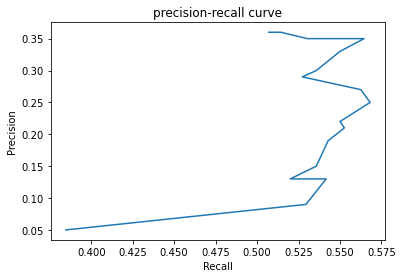

In [15]:
recalls =[]
precisions =[]
for i in np.arange(0.6,0.9,0.01):
    subset['Predicted'] = subset['Score'].apply(lambda x:1 if x>i else 0)
    TP = len(subset[(subset['label']==1)&subset['Predicted']==1])
    TN = len(subset[(subset['label']==0)&subset['Predicted']==0])
    FP = len(subset[(subset['label']==0)&subset['Predicted']==1])
    FN = len(subset[(subset['label']==1)&subset['Predicted']==0])
    recalls.append(TP/(TP+FP))
    precisions.append(TP/(TP+FN))
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve')

In [16]:
f = open("../data/outputs/segmentation.txt", "r")

In [17]:
text = f.read()

In [18]:
tokens = list(map(lambda y: list(map(lambda x:x[8:-9].replace(' ','_'),re.findall('<phrase>[^<]+</phrase>',y)))+list(filter(lambda x:len(x)>0,re.sub('<phrase>[^<]+</phrase>','',y).split(' '))),text.split('\n')))

In [19]:
tokens

[['c++',
  'c++',
  'oql[]',
  'extending',
  'with',
  'an',
  'object',
  'query',
  'capability'],
 ['management', 'transaction', 'in', 'multidatabase', 'systems'],
 ['overview', 'of', 'the', 'adds', 'system'],
 ['multimedia', 'information', 'systems', 'issues', 'and', 'approaches'],
 ['active_database', 'systems'],
 ['object-oriented',
  'where',
  'dbmss',
  'should',
  'do',
  'better',
  'a',
  'critique',
  'based',
  'on',
  'early',
  'experiences'],
 ['databases', 'distributed'],
 ['object-oriented',
  'dbms',
  'war',
  'genome',
  'database',
  'c++',
  'an',
  'story',
  'developing',
  'a',
  'mapping',
  'in'],
 ['cooperative', 'transactions', 'for', 'multiuser', 'environments'],
 ['architecture',
  'schema',
  'of',
  'the',
  'unisql/m',
  'multidatabase',
  'system'],
 ['management', 'physical', 'object'],
 ['database',
  'technology',
  'introduction',
  'to',
  'part',
  '1',
  'next-generation'],
 ['object-oriented', 'database', 'systems', 'promises'],
 ['technolo

Try to run the word2vec code on the phrasal segmentation results to obtain phrase embedding. 

In [20]:
model = Word2Vec(tokens,workers=9)

In [21]:
model.wv.vocab

{'c++': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d110>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d190>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d750>,
 'object': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d810>,
 'query': <gensim.models.keyedvectors.Vocab at 0x7f3abf23dc50>,
 'management': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d150>,
 'transaction': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d450>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d650>,
 'multidatabase': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d610>,
 'systems': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d550>,
 'overview': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d6d0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d0d0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d8d0>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d790>,
 'multimedia': <gensim.models.keyedvectors.Vocab at 0x7f3abf23d9d0>,
 'information': <gensim

Phrase Embedding shown above.

Pick 3 high-quality phrases from your previous annotations in step 1, run a similarity search among all multi-word phrases whose scores are greater than 0.5, and report the top-5 results. Comment on the results. 

3 high-quality phrases

In [31]:
sample3 = ['active_database','computer_science','case_study']

all multi-word phrases whose scores are greater than 0.5

In [32]:
allmulti = list(map(lambda x:x.replace(' ','_'),df[df['Score']>0.5]['Words'].tolist()))

In [33]:
try:
    model.wv.most_similar(positive=sample3,topn=5)
except:
    print('test data does not necessarily support this operation!')

[('as', 0.9993882179260254),
 ('an', 0.999386727809906),
 ('and', 0.999373733997345),
 ('it', 0.9993705153465271),
 ('at', 0.9993689060211182)]